In [2]:
from circos_functions import *

In [3]:
# Set up parameters
conn_matrix = np.loadtxt('../corrmat.txt')
df_roi_list = pd.read_csv('../roi_list_192.csv')

In [4]:
# Filter the functional connectivity matrix to only include the strongest 2% of connections for plotting
threshold_value = np.percentile(np.abs(conn_matrix), 98)
mask = np.abs(conn_matrix) < threshold_value
conn_matrix[mask] = 0

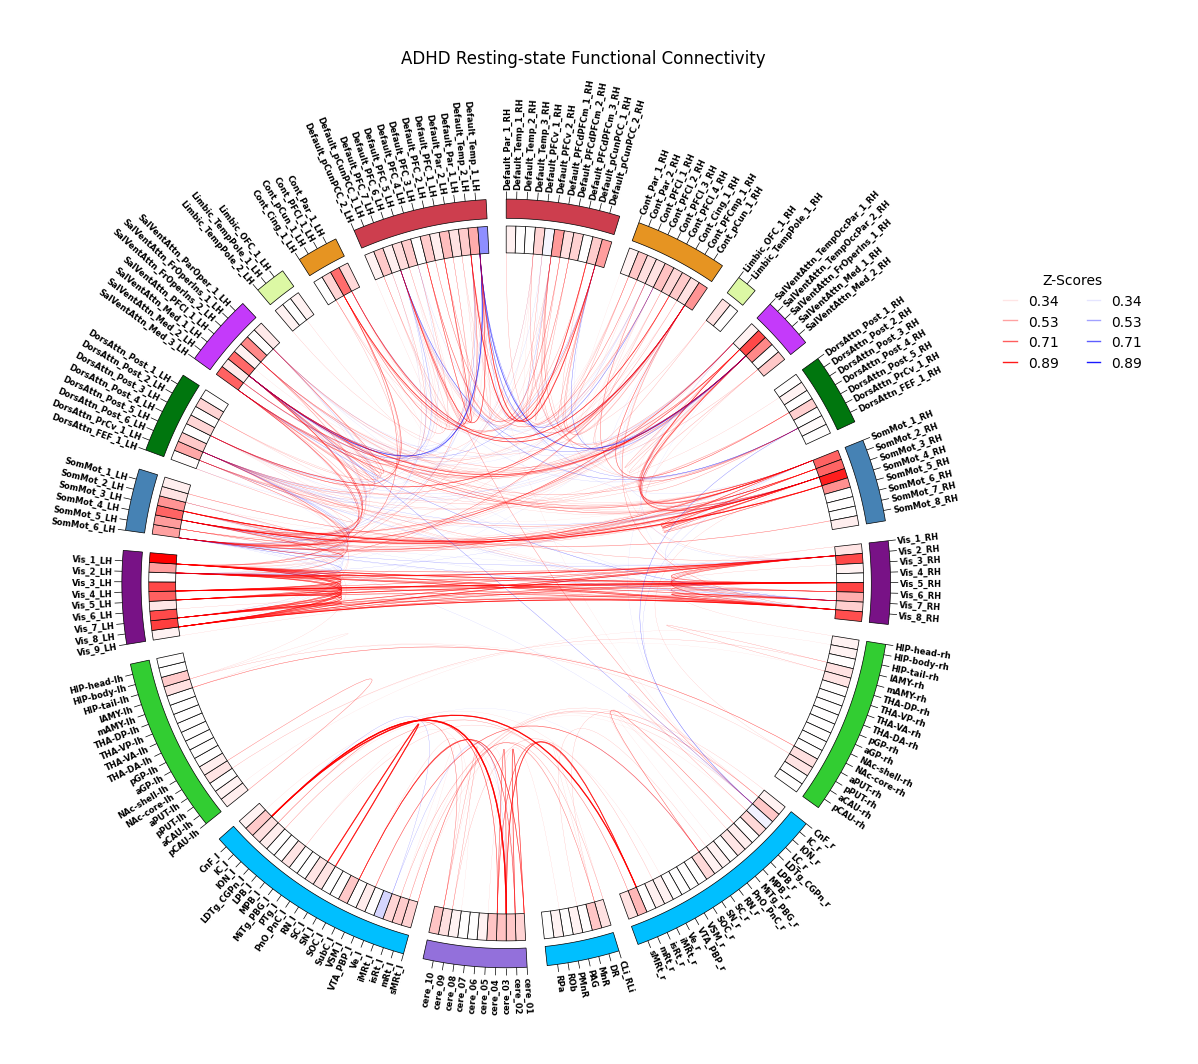

In [14]:
# Plot Circos
fig, ax = plt.subplots(figsize=(12, 10), subplot_kw={'projection': 'polar'})
bound = calc_weighted_deg_bound(conn_matrix)
deg_bound_lower, deg_bound_upper = -bound, bound
conn_strength_min, conn_strength_max = calc_min_max_conn_strength(conn_matrix)
circos = plot_degree_tracks(conn_matrix, df_roi_list, deg_bound_lower, deg_bound_upper)
circos = plot_links(circos, conn_matrix, df_roi_list, conn_strength_min, conn_strength_max)
circos.plotfig(ax=ax)

# Plot legend for connectivity values
pos_handles = create_legend_handles(conn_strength_min, conn_strength_max, color='red')
neg_handles = create_legend_handles(conn_strength_min, conn_strength_max, color='blue')
handles = pos_handles + neg_handles
ncols = 2
ax.legend(handles=handles, bbox_to_anchor=(1.1, 0.9), ncols=ncols, title='Z-Scores') 

# Title and save plot
fig.suptitle('ADHD Resting-state Functional Connectivity')
plt.tight_layout()
plt.savefig('../circos_plot.png')
